# Team Name:  ***TAX EVASION***
## ***Introduction***
Hello to whoever is reading this! My group, "Tax Evasion"'s project is based on which Pittsburgh neighborhood is the best. The best for what? Our group wanted to do something exciting and different, and a lot of different ideas were bounced around. *Best neighborhood to commit tax evasion*, *Best neighborhood to survive the zombie apocolypse*, but we finally settled on one we believe brought out our full creativity. The best neighborhood for surviving a **NUCLEAR EXPLOSION!!!** 

![BOOSH](https://media.giphy.com/media/rhYsUMhhd6yA0/giphy.gif)

We thought, where around Pittsburgh would be the most feasible for this feat? What kinds of things besides just shelter and resources do we have to consider? And so: our beautiful and terrifying project was born.

## **Metrics**
We have a total of *four* metrics to quantify which neighborhood would work best as a shelter for a nuclear explosion. Some metrics have to do with the preparation before and during the explosion, while others deal with the aftermath.

1. For our first metric, we have the amount of **Particulate Matter** in the air. Particualte matter is defined by the EPA as "a mixture of solid particles and liquid droplets found in the air" ("Particulate Matter (PM) Basics"). These air particles are able to become radiated, so this leads into how the metric relates to our topic. After the bomb explodes, in the fallout with radiation in the air, you want to be somewhere without floating particles of radiation that can get into your lungs! By using the *Allegheny County Particulate Matter 2.5* dataset from WPRDC, which measures the amount of PM (particulate matter) that is in the air at a certain time, we found that the further you move away from Pittsburgh the less PM you will find. This is depicted on the heatmap shown below.

2. Our second metric is the location of **bridges**. In a nuclear fallout, you need to be able keep moving place to place, so that you can get as far from the radiation as possible. By mapping every bridge in Pittsburgh, you are able to plot out the best route out of the city.

3. The third metric is the frequency of **restaurants** located in Pittsburgh. This is because they will not only provide shelter from the harmful elements outside, but also store foods. The dataset I'm using is a list of restaurants and the zip codes they are located in around Allegheny County, which I sort through.

4. The final metric is the number of **supermarkets** located within the towns of Pittsburgh. The dataset I'm using is the location of all the supermarkets recorded in Pittsburgh and the towns in which they reside in.

## **Best Neighborhood(s) According to Data**
### Michael's data

In [4]:
#import statments
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
#import datasets
partMat = pd.read_csv("pm2.52011ct.csv")
tractNames = pd.read_csv("Pittsburgh-tract-and-names.csv")
tractNames.rename(columns = {'TRACT':'CensusTract'}, inplace = True)
#filter the important info
num_PM = partMat.groupby("CensusTract").sum()['PM25']
num_PM.sort_values(ascending=True)
# put the two datasets together
merged = pd.merge(partMat, tractNames[['CensusTract', 'Neighborhood', 'geoid20']], on='CensusTract', how = 'left').dropna().sort_values('PM25', ascending = True)
#check to see if it worked
merged.head()

,CensusTract,PM25,Neighborhood,geoid20
5906,563000,12.157559,Chartiers City,4.200356e+14
5902,563000,12.157559,Chartiers City,4.200356e+14
5901,563000,12.157559,Chartiers City,4.200356e+14
5940,563000,12.157559,Windgap,4.200356e+14
5899,563000,12.157559,Chartiers City,4.200356e+14


The code above takes the two datasets, the one with the PM25 indexes and the one with the names of neighborhoods, and then merges them together into one, neat dataFrame.

In [6]:
# get rid of any repeating neighborhoods
merged.drop_duplicates(subset = 'Neighborhood', inplace = True)
#5 least amount of PM25
merged.head()

,CensusTract,PM25,Neighborhood,geoid20
5906,563000,12.157559,Chartiers City,4.200356e+14
5940,563000,12.157559,Windgap,4.200356e+14
5924,563000,12.157559,Fairywood,4.200356e+14
1407,101100,12.157773,Upper Lawrenceville,4.200310e+14
6055,980000,12.158553,Lincoln-Lemington-Belmar,4.200398e+14


In [7]:
#5 most amount of PM25 (order is from bottom to top)
merged.tail()

,CensusTract,PM25,Neighborhood,geoid20
2512,160800,12.358962,Arlington - Arlington Heights,4.200316e+14
2366,141400,12.376482,Swisshelm Park,4.200314e+14
5268,562300,12.379904,Glen Hazel,4.200356e+14
5292,562300,12.379904,Hazelwood,4.200356e+14
4761,310200,12.455896,Lincoln Place,4.200331e+14


The above two cells are for the express purpose of sorting and finding out the top five most and least PM 2.5 per neighborhood. As you can see, the neighborhood with the most amount of PM 2.5 is Lincoln Place, and the one with the least amount is a three way tie between Chartier City, Windgap, and Fairywood. This tie is most likely becase they are all part of the same Census Tract, which is how the data was distributed.

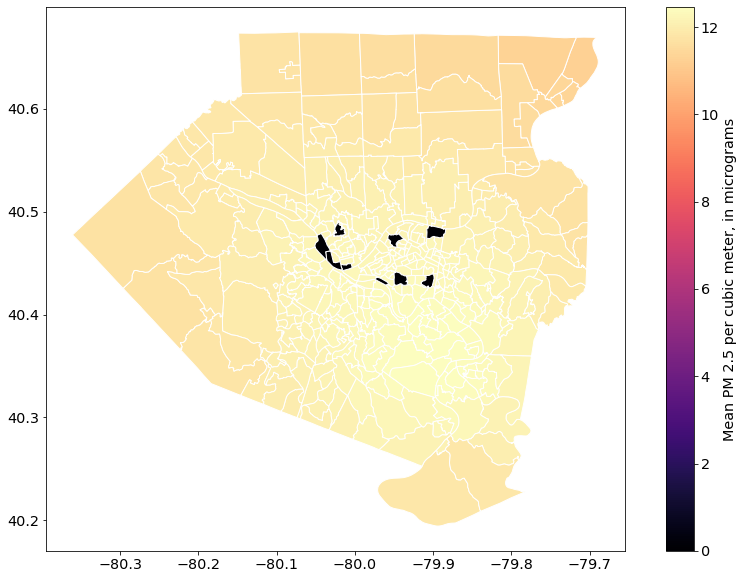

In [8]:
#read in shape file
allegheny = geopandas.read_file("Particulate_Matter/ParticulateMatter2.5.shp")
#now to merge the data
pm_map = allegheny.merge(merged, how='left', left_on='PM25', right_on="PM25")

#draw a "choropleth" map using data from column
missing_kwds = dict(color = 'grey', label = 'No Data')

ax = pm_map.plot(column='PM25', 
            cmap='magma',
            edgecolor="white", 
            legend = True, 
            legend_kwds={'label': "Mean PM 2.5 per cubic meter, in micrograms"},
            figsize = (15,10)
           )

This is a heatmap of all of Allegheny County in terms of it's levels of PM 2.5. Each chunk of land is seperated by Census Tract, which is just a fancy way of saying subdivisions of a county. The issue is, the map is basically the same color, as well as not zoomed in on Pittsburgh, so we had to change that.

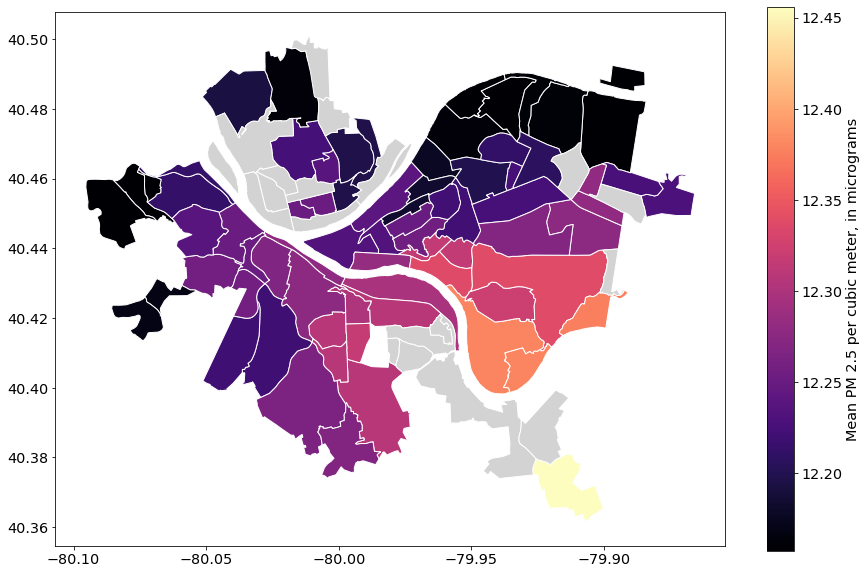

In [9]:
# zoom in on pittsburgh
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
# add the PM25 data to the Pittsburgh map data
heat_map = neighborhoods.merge(merged, how='left', left_on='hood', right_on='Neighborhood')
heat_map.plot(column='PM25', # set the data to be used for coloring
               cmap='magma',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Mean PM 2.5 per cubic meter, in micrograms"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

Using the Pittsburgh file from a previous lab, I was able to merge my map with that one creating a zoomed in heat map of Pittsburgh, and it's different PM 2.5 levels. As a clarification: the gray spots are census tracts with 'nan' data. 

According to the data shown in my heat map, as well as the "top 5" data that I had; Chartiers City, Windgap, and Fairywood are all tied for having the *least* amount of PM 2.5, meaning being in any of those neighborhoods would mean a lower chance of inhaling harmful, radioactive particles. 

### Kieran's data

In [10]:
import pandas as pd
import geopandas as gpd

import numpy as np
import contextlib as ctx
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [11]:
bridges = pd.read_csv("bridges.csv") #read in csv file
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

geometry = [Point(xy) for xy in zip(bridges['longitude'], bridges['latitude'])] #create a list for Point objects, using lat and long as the attributes
geo_df = gpd.GeoDataFrame(bridges, geometry = geometry)

fig, ax = plt.subplots(figsize = (10,10)) #create subplots
neighborhoods.to_crs(epsg = 4326).plot(ax=ax, edgecolor = "black") #change the format to same as loc_gf, and plot
geo_df.plot(ax = ax, color = 'red')  #dots to red
ax.set_title('Bridges in Pittsburgh')

ax.set_axis_off()



*The map below shows the start of every bridge in Pittsburgh, keep in mind some of the bridges that cross the rivers appear to be more inset than they are, because thats where their onramp's start. This was designed on purpose, because nuclear attack survivors need to know where the bridge starts. Also shown below is the amount of bridges per neighborhood, and it's evident that Squirrel Hill South and Downtown would provide the most mobility in a nuclear attatck.*

Squirrel Hill South          14
Central Business District    12
Troy Hill                     7
Overbrook                     6
Hays                          6
Shadyside                     6
Oakwood                       5
South Side Slopes             5
South Side Flats              5
West End                      4
Name: neighborhood, dtype: int64

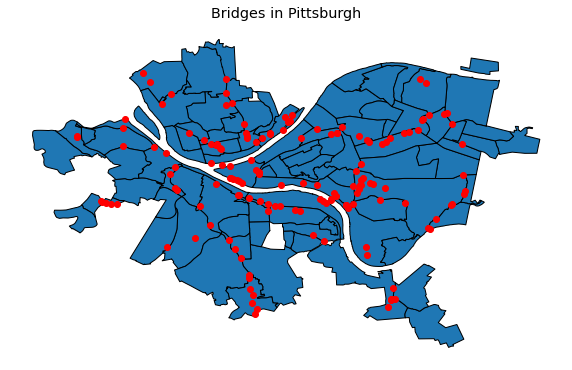

In [12]:
bridges["neighborhood"].value_counts().head(10)

### Ed's Data

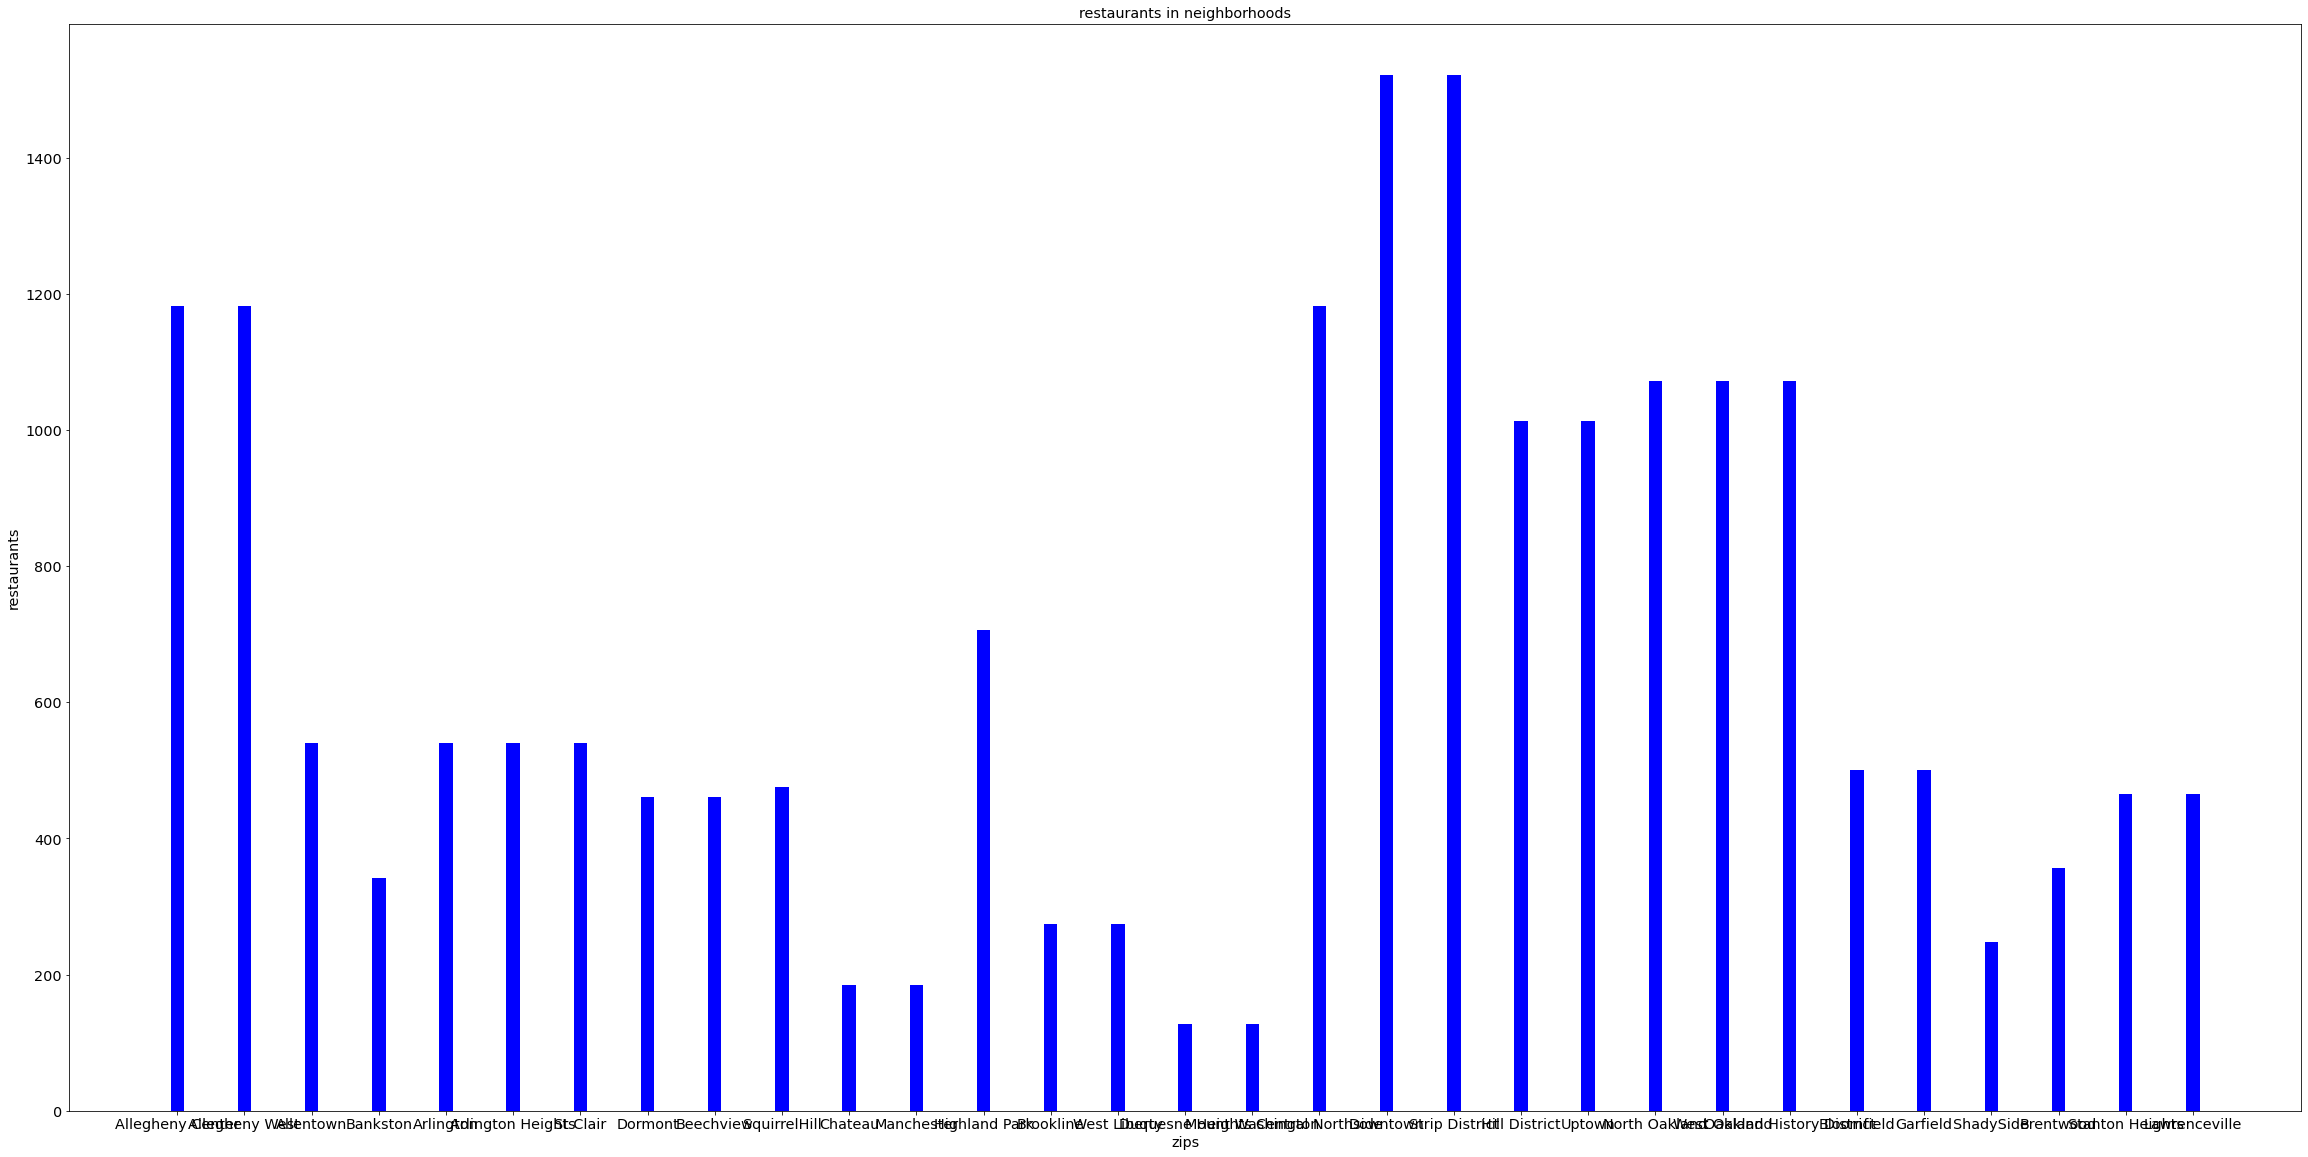

In [13]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

chip = pd.read_csv("pittsburghfoodfacilties.csv")


new_dict = { }
burghzips = [15212.0, 15201.0, 15233.0, 15210.0, 15220.0, 15216.0, 15219.0, 15213.0, 15224.0, 15226.0, 15227.0, 15222.0, 15232.0, 15217.0, 15211.0, 15206.0]

dict2= {
       "Allegheny Center":0, "Allegheny West":0, "Allentown":0, "Bankston":0
        }

for index,row in chip.iterrows():
    new_key = row['zip']
    if(new_key not in burghzips):
        continue
    else:
        
        if new_key in new_dict:
            new_dict[new_key] =  new_dict[new_key] + 1
        else:
            new_dict[new_key] = 1

            
count = 0;
for zips in new_dict:
    if(zips== 15216):
        dict2["Dormont"]= new_dict[15216]
        dict2["Beechview"]= new_dict[15216]
    if(zips== 15212):
        dict2["Allegheny Center"]= new_dict[15212]
        dict2["Allegheny West"]= new_dict[15212]
        dict2["Central Northside"]= new_dict[15212]
    if(zips== 15210):
        dict2["Allentown"]= new_dict[15210]
        dict2["Arlington"] =new_dict[15210]
        dict2["Arlington Heights"] =new_dict[15210]
        dict2["St Clair"] = new_dict[15210]
    if(zips== 15220):
        dict2["Bankston"] = new_dict[15220]
        dict2["Bankston"] = new_dict[15220]
    if(zips== 15219):
        dict2["Hill District"] = new_dict[15219]
        dict2["Uptown"]= new_dict[15219]
    if(zips== 15222):
        dict2["Downtown"]= new_dict[15222]
        dict2["Strip District"] = new_dict[15222]
    if(zips== 15201):
        dict2["Stanton Heights"]= new_dict[15201]
        dict2["Lawrenceville"]= new_dict[15201] 
    if(zips== 15211):
        dict2["Duquesne Heights"]= new_dict[15211] 
        dict2["Mount Washington"]= new_dict[15211] 
    if(zips== 15232):
        dict2["ShadySide"]= new_dict[15232] 
    if(zips== 15217):
        dict2["SquirrelHill"]= new_dict[15217]
    if(zips== 15213):
        dict2["North Oakland"]= new_dict[15213]
        dict2["West Oakland"]= new_dict[15213]
        dict2["Oakland History District"]= new_dict[15213]
    if(zips== 15224):
        dict2["Bloomfield"]= new_dict[15224]
        dict2["Garfield"]= new_dict[15224]
    if(zips== 15206):
        dict2["Highland Park"]= new_dict[15206]
    if(zips== 15233):
        dict2["Chateau"]= new_dict[15233]
        dict2["Manchester"]= new_dict[15233]
    if(zips== 15226):
        dict2["Brookline"]= new_dict[15226]
        dict2["West Liberty"]= new_dict[15226]
    if(zips== 15227):
        dict2["Brentwood"]= new_dict[15227]
            

zips = list(dict2.keys())
values = list(dict2.values())
fig = plt.figure(figsize= (40,20))

plt.bar(zips, values, color= 'blue', width = 0.2)

plt.xlabel("zips")
plt.ylabel("restaurants")
plt.title("restaurants in neighborhoods")
plt.show()

### Sahil's Data

In [14]:
import pandas as pd
import geopandas as gpd

import numpy as np
import contextlib as ctx
from shapely.geometry import Point
import matplotlib.pyplot as plt

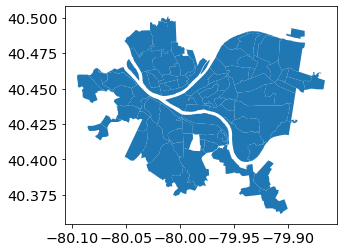

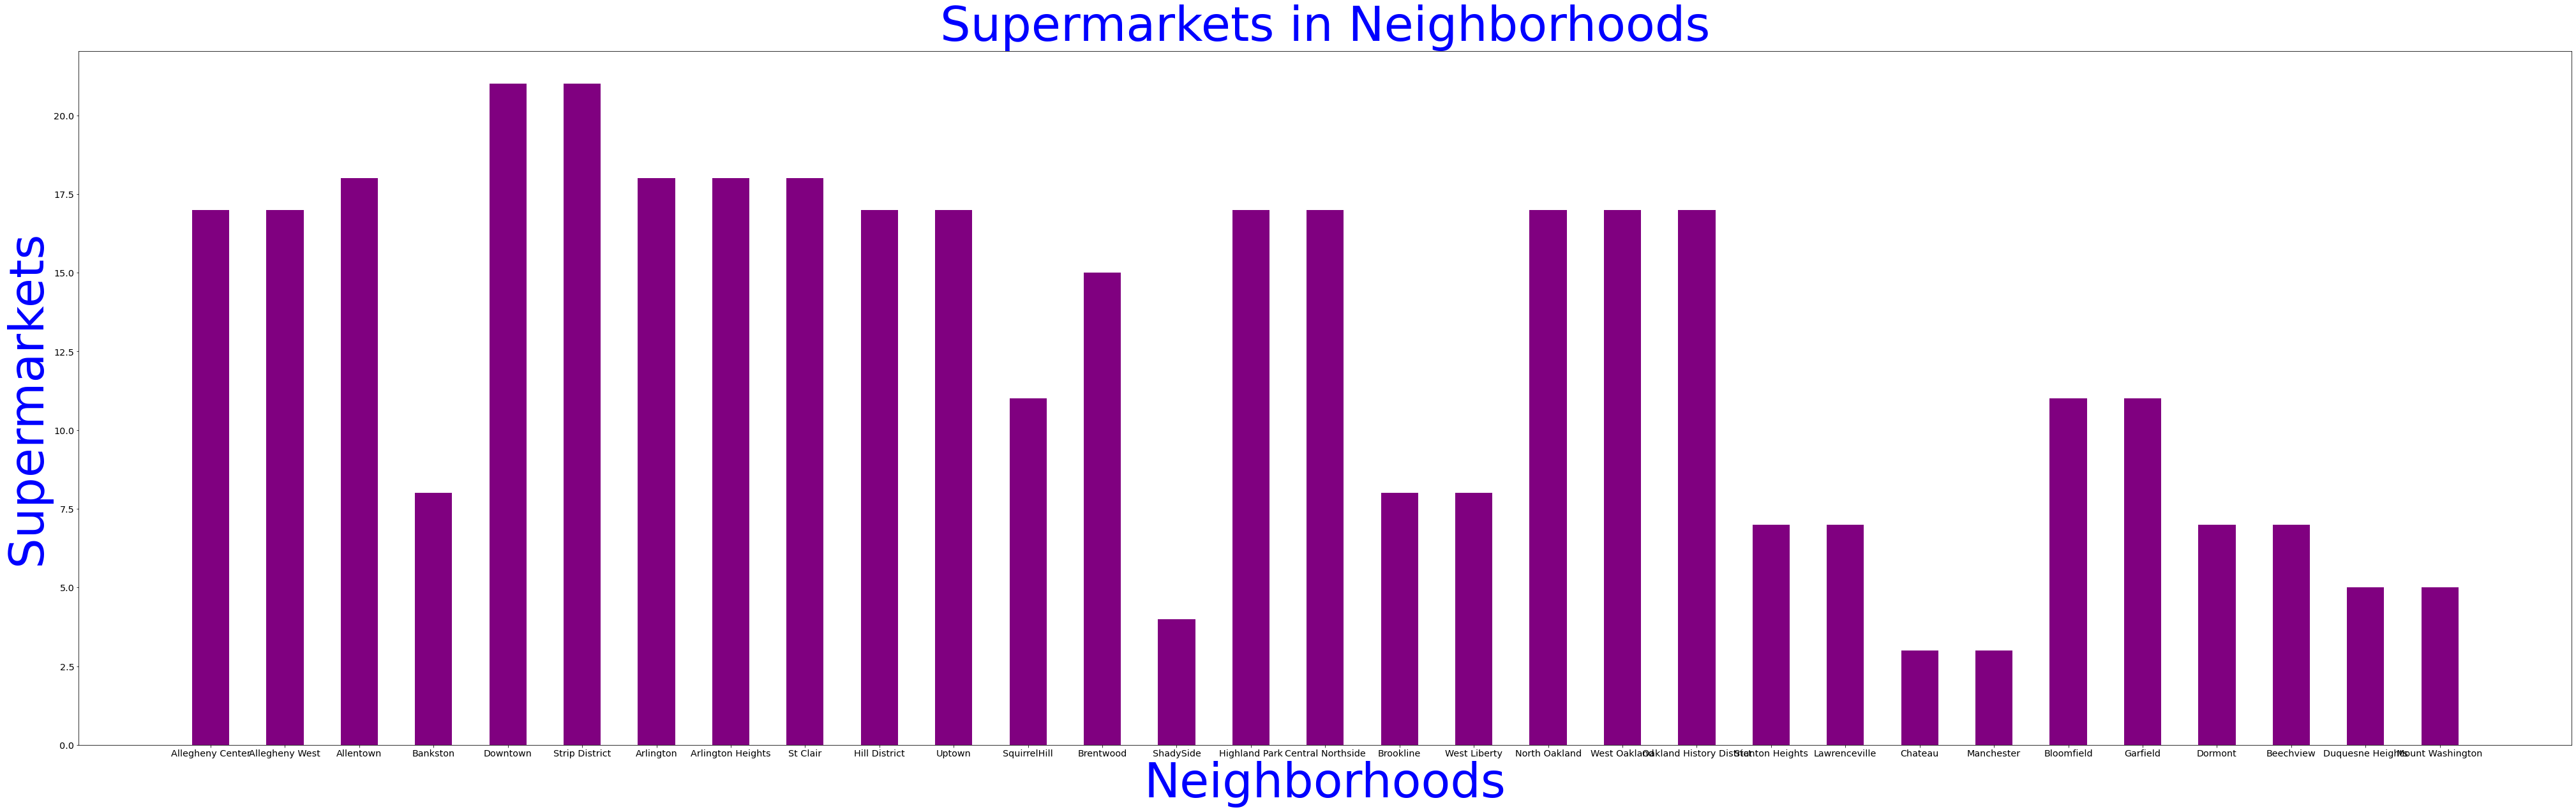

In [15]:
#### read in CSV File
sm = pd.read_csv("SupermarketsData.csv").dropna(subset=['Lat','Lon'])
neighborhoods = gpd.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot() 

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (50, 20),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

#df_geo = gpd.GeoDataFrame(sm, geometry = gpd.points_from_xy(sm.Lat, sm.Lat))

new_dict = { }
Pittzip = [15212.0, 15201.0, 15233.0, 15210.0, 15220.0, 15216.0, 15219.0, 15213.0, 15224.0, 15226.0, 15227.0, 15222.0, 15232.0, 15217.0, 15211.0, 15206.0]

dict2= {
       "Allegheny Center":0, "Allegheny West":0, "Allentown":0, "Bankston":0
        }

for index,row in sm.iterrows():
    new_key = row['Zip']
    if(new_key not in Pittzip):
        continue
    else:
        if new_key in new_dict:
            new_dict[new_key] =  new_dict[new_key] + 1
        else:
            new_dict[new_key] = 1
count = 0;
for zips in new_dict:
    if(zips== 15216):
        dict2["Dormont"]= new_dict[15216]
        dict2["Beechview"]= new_dict[15216]
    if(zips== 15212):
        dict2["Allegheny Center"]= new_dict[15212]
        dict2["Allegheny West"]= new_dict[15212]
        dict2["Central Northside"]= new_dict[15212]
    if(zips== 15210):
        dict2["Allentown"]= new_dict[15210]
        dict2["Arlington"] =new_dict[15210]
        dict2["Arlington Heights"] =new_dict[15210]
        dict2["St Clair"] = new_dict[15210]
    if(zips== 15220):
        dict2["Bankston"] = new_dict[15220]
        dict2["Bankston"] = new_dict[15220]
    if(zips== 15219):
        dict2["Hill District"] = new_dict[15219]
        dict2["Uptown"]= new_dict[15219]
    if(zips== 15222):
        dict2["Downtown"]= new_dict[15222]
        dict2["Strip District"] = new_dict[15222]
    if(zips== 15201):
        dict2["Stanton Heights"]= new_dict[15201]
        dict2["Lawrenceville"]= new_dict[15201] 
    if(zips== 15211):
        dict2["Duquesne Heights"]= new_dict[15211] 
        dict2["Mount Washington"]= new_dict[15211] 
    if(zips== 15232):
        dict2["ShadySide"]= new_dict[15232] 
    if(zips== 15217):
        dict2["SquirrelHill"]= new_dict[15217]
    if(zips== 15213):
        dict2["North Oakland"]= new_dict[15213]
        dict2["West Oakland"]= new_dict[15213]
        dict2["Oakland History District"]= new_dict[15213]
    if(zips== 15224):
        dict2["Bloomfield"]= new_dict[15224]
        dict2["Garfield"]= new_dict[15224]
    if(zips== 15206):
        dict2["Highland Park"]= new_dict[15206]
    if(zips== 15233):
        dict2["Chateau"]= new_dict[15233]
        dict2["Manchester"]= new_dict[15233]
    if(zips== 15226):
        dict2["Brookline"]= new_dict[15226]
        dict2["West Liberty"]= new_dict[15226]
    if(zips== 15227):
        dict2["Brentwood"]= new_dict[15227]
        
zips = list(dict2.keys())
values = list(dict2.values())
fig = plt.figure(figsize= (70,20))

plt.bar(zips, values, color= 'purple', width = 0.5)

plt.xlabel("Neighborhoods", fontsize = 75, color = 'blue')#FOntsize of axis titles and colro changed
plt.ylabel("Supermarkets", fontsize = 75, color = 'blue')
plt.title("Supermarkets in Neighborhoods", fontsize = 75, color = 'blue')
plt.show()

## *Group Conclusion*
As a group, we decided that the best neighborhood to survive a nuclear blast in (based on our data) is Allegeny Center. They are not only tied for second for most amount of restaurants, meaning more possible food, but also they are on the Northern side of Pittsburgh, which, as we explained earlier, means that there will be less harmful, radioactive particles on average. Also, as shown on the bridge point map, there are several bridges posted around the neighborhood, which means that in the case that one should collapse, there would be other options for movement around and out of the Pittsburgh area.

## *Individual Conclusions*

**Michael**:
* The amount of neighborhoods that I have been too are very limited, so I am unable to give an accurate description of what other neihborhoods around Pittsburgh are like. However, I would think that any neighborhood thats closest to the center of the Pittsburgh map would be the worst according to PM 2.5 data, because that is where all the big buildings are. However, my data proves that that is not the case, showing that the further South you go, the more PM 2.5 there is. I believe this is must be because of the wind carrying the Particles Southward.

**Kieran**
* According to my data, Downtown and Squirrel Hill South contain the most amount of bridges and would be ideal should there every be a nuclear strike on Pittsburgh. Personally, I was a little saddened to see that South Oakland didn't make the list, as it is my personal favorite neighborhood. However, this is to be expected as South Oakland does not border one of the rivers. Downtown is the overall top contender, as it has the most amount of resources, most amount of bridges, and relatively low levels of particulate matter. 


**Ed**
* It is clear that Downtown, Strip District, and close surroundings have the most restaurants. This is followed by Allegheny Center/West and Central Northside which both tied at second most food facilities. As such, it is most likely to survive a nuclear fallout in either the Downtown region, or in the Northside/Allegheny Center/West. These places tend to be highly populated so there could be conflict with other scavengers. Thus, you need at least 10 charism and a lot of stimpack. Halal guys and mcdonald is worth pillaging over.👨🏿‍🦽

**Sahil**
* The towns with the most amount of supermarkets are a tie between Strip District and Downtown. THis means that in terms of having a wide array of supermarkets to choose from, these would be the best places to be for resources and shelter. Close behind them are a number of towns such as allegeny center, arlington heights, and arlington. These places woudl also work as they also have a high amount of supermarkets in their arsenal.